In [1]:
%load_ext lab_black

In [1]:
import pandas as pd

from venn import venn
import seaborn as sns
import scipy.stats as sts

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
clinic = pd.read_excel(
    "../data/Additional/EPICOVID IDs_407pts_EBioMedicine2021.xlsx", index_col=0
)

sample_mapper = dict(pd.read_csv("../data/raw/GSE168739_ANNOTS.csv", index_col=0)["ID"])
sample_mapper = {epi: idx for idx, epi in sample_mapper.items()}

clinic.index = clinic.index.map(sample_mapper)
clinic

,COVID-19 clinical course,Age (years),Gender (F=Female; M=Male),GSM
EPICOVID_ID (GEO),,,,
GSM5163386,Asymptomatic/Paucisymptomatic,34,F,GSM5163386
GSM5163387,Severe,50,F,GSM5163387
GSM5163388,Severe,46,M,GSM5163388
GSM5163389,Severe,52,M,GSM5163389
GSM5163390,Severe,42,M,GSM5163390
...,...,...,...,...
GSM5163788,Severe,41,M,GSM5163788
GSM5163789,Severe,40,F,GSM5163789
GSM5163790,Severe,28,F,GSM5163790


In [3]:
cpgs = pd.read_excel(
    "../Art/EstelerCov407/1-s2.0-S2352396421001328-mmc4.xls", index_col=0, skiprows=1
).index
len(cpgs)

44

In [4]:
# Visualise EPICOVID signature on raw data

In [5]:
cov_407_no_cfc = pd.read_csv(
    "../data/interim/SpainCoVHB/concated_myNorm_no_CFC/concated_COV407_HB83.csv",
    index_col=0,
)
cov_407_no_cfc = cov_407_no_cfc[
    [name for name in cov_407_no_cfc.columns if name.startswith("GSM")]
]

ovrlp = set.intersection(set(cpgs), set(cov_407_no_cfc.index))
cov_407_no_cfc = cov_407_no_cfc.loc[ovrlp, :]

<Figure size 936x936 with 0 Axes>

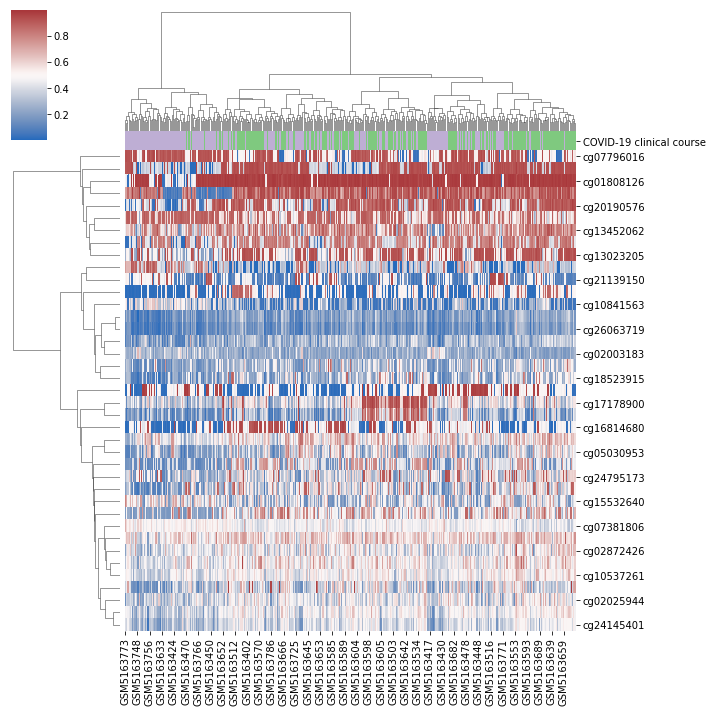

In [6]:
pal = sns.color_palette("Accent", clinic["COVID-19 clinical course"].nunique())
lut = dict(zip(map(str, clinic["COVID-19 clinical course"].unique()), pal))
colors = clinic["COVID-19 clinical course"].map(lut)

plt.figure(figsize=(13, 13))

fig = sns.clustermap(cov_407_no_cfc, cmap="vlag", col_colors=colors, method="ward")
plt.show()

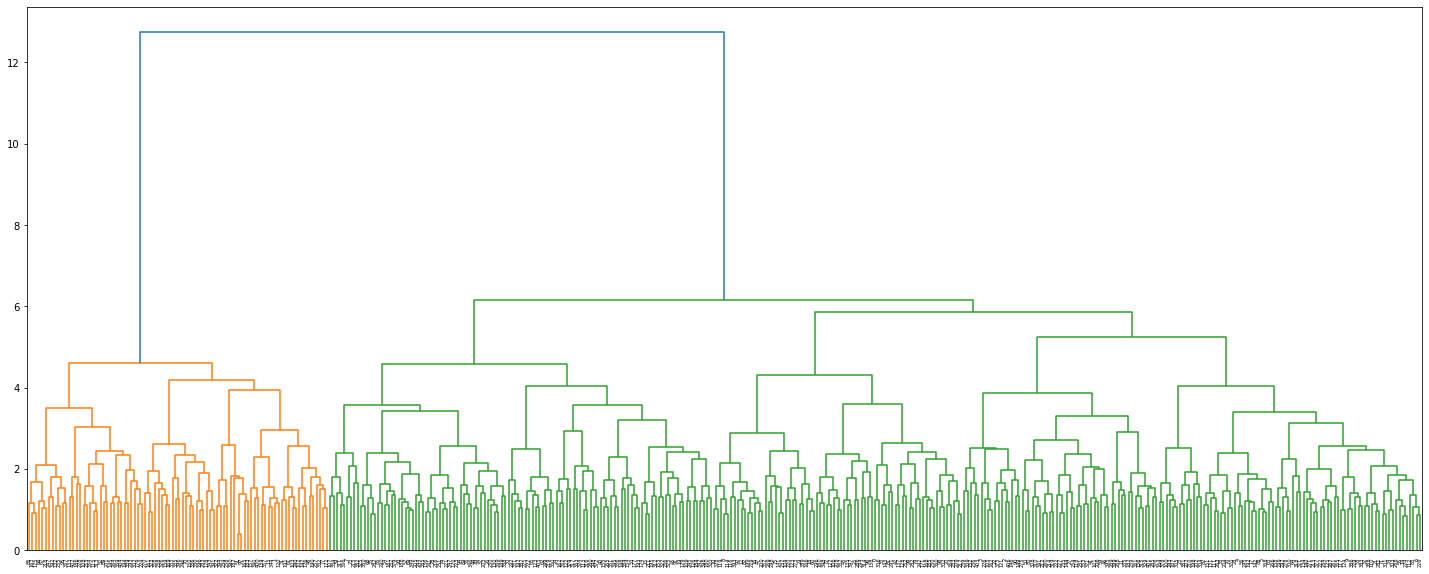

In [7]:
Z = linkage(cov_407_no_cfc.T, "ward")
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [8]:
cluster = pd.DataFrame(
    fcluster(Z, 12, criterion="distance"),
    index=cov_407_no_cfc.columns,
    columns=["Cluster"],
)
cluster = pd.concat((cluster, clinic), axis=1)

df = pd.crosstab(cluster["Cluster"], cluster["COVID-19 clinical course"])
df

COVID-19 clinical course,Asymptomatic/Paucisymptomatic,Severe
Cluster,,
1,6,82
2,188,131


In [9]:
sts.chi2_contingency(df)

(73.02333792198027,
 1.2812579788682156e-17,
 1,
 array([[ 41.94594595,  46.05405405],
        [152.05405405, 166.94594595]]))

In [10]:
# Visualise EPICOVID signature on corrected data

In [11]:
cov_407_cfc = pd.read_csv(
    "../data/processed/CorrectedMyNorms/COVSpain407_HB83_CFC.csv", index_col=0
)
cov_407_cfc = cov_407_cfc[
    [name for name in cov_407_cfc.columns if name.startswith("GSM")]
]

ovrlp = set.intersection(set(cpgs), set(cov_407_cfc.index))
cov_407_cfc = cov_407_cfc.loc[ovrlp, :]

<Figure size 936x936 with 0 Axes>

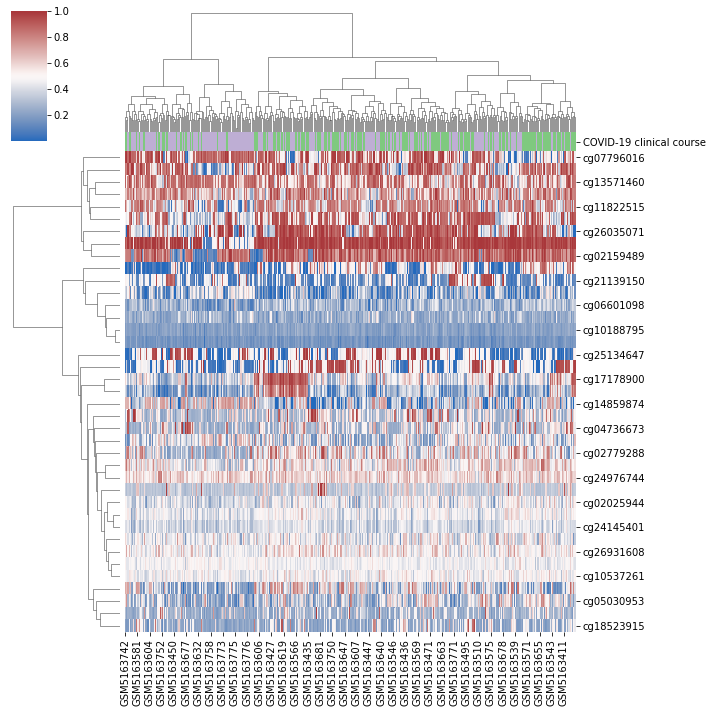

In [12]:
pal = sns.color_palette("Accent", clinic["COVID-19 clinical course"].nunique())
lut = dict(zip(map(str, clinic["COVID-19 clinical course"].unique()), pal))
colors = clinic["COVID-19 clinical course"].map(lut)

plt.figure(figsize=(13, 13))

fig = sns.clustermap(cov_407_cfc, cmap="vlag", col_colors=colors, method="ward")
plt.show()

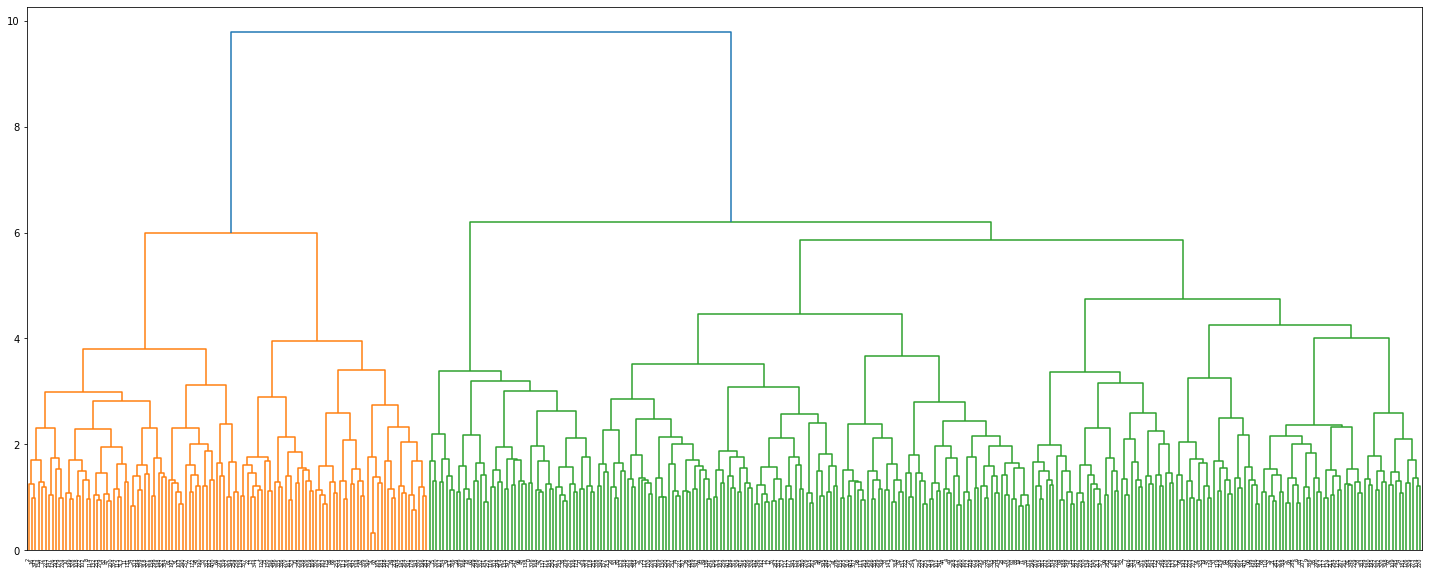

In [13]:
Z = linkage(cov_407_cfc.T, "ward")
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [14]:
cluster = pd.DataFrame(
    fcluster(Z, 8, criterion="distance"),
    index=cov_407_no_cfc.columns,
    columns=["Cluster"],
)

cluster = pd.concat((cluster, clinic), axis=1)
df = pd.crosstab(cluster["Cluster"], cluster["COVID-19 clinical course"])

In [15]:
sts.chi2_contingency(df)

(35.75672949182053,
 2.2355841726125606e-09,
 1,
 array([[ 55.76904177,  61.23095823],
        [138.23095823, 151.76904177]]))

In [16]:
# Venn

<AxesSubplot:>

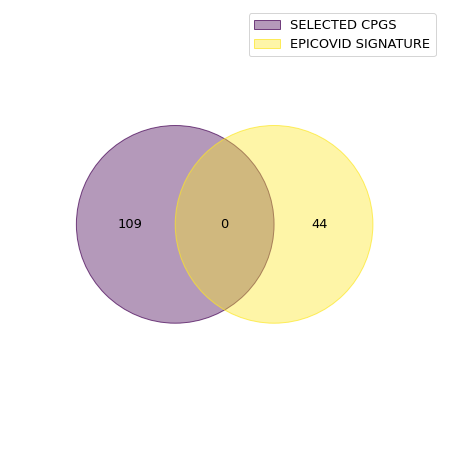

In [18]:
selected = pd.read_csv("../CpGsCommonForAllGroups.csv", index_col=0).index

venn({"SELECTED CPGS": set(selected), 
      "EPICOVID SIGNATURE": set(cpgs)})